In [1]:
# Import libraries we need

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans




In [2]:
# import dataset

dataset = pd.read_csv('../data.csv')
dataset = dataset.set_index("CLI_ID")
dataset.head()

,UNIVERS,MOIS_VENTE,FAMILLE,MAILLE,"('PRIX_NET', 'min')","('PRIX_NET', 'max')","('PRIX_NET', 'mean')"
CLI_ID,,,,,,,
1490281,VIS_DEMAQ AAAR,10,SOINS DU VISAGE,VIS_AAAR_DEMAQLOTION,1.66,7.45,3.680000
13290776,PARF_EAUX PARFUMS,12,PARFUMAGE,PARF_PARFUM,1.75,13.00,6.166667
20163348,MAQ_LEV RAL Brillance,1,MAQUILLAGE,MAQ_LEV_RAL_HMG,7.45,7.45,7.450000
20200041,VIS_CJOUR Jeunes Specifique,1,SOINS DU VISAGE,VIS_JEUNE_ET_LEVRE,1.25,5.45,3.350000
20561854,MAQ_ONG Vernis LUM,3,MAQUILLAGE,MAQ_ONGLES,1.65,2.95,2.350000


In [3]:
# Dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852554 entries, 1490281 to 997385337
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   UNIVERS               852554 non-null  object 
 1   MOIS_VENTE            852554 non-null  int64  
 2   FAMILLE               852554 non-null  object 
 3   MAILLE                852554 non-null  object 
 4   ('PRIX_NET', 'min')   852554 non-null  float64
 5   ('PRIX_NET', 'max')   852554 non-null  float64
 6   ('PRIX_NET', 'mean')  852554 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 52.0+ MB


In [4]:
# Check if there is null value in the dataset
dataset.isnull().sum()

UNIVERS                 0
MOIS_VENTE              0
FAMILLE                 0
MAILLE                  0
('PRIX_NET', 'min')     0
('PRIX_NET', 'max')     0
('PRIX_NET', 'mean')    0
dtype: int64

In [5]:
1 # Drop useless data
# dataset.drop(['CLI_ID'], axis=1, inplace=True)
# dataset.head()

1

In [6]:
# Convert categorical variable into integers 
X = dataset

leUnivers = LabelEncoder()
leFamille = LabelEncoder()
leMaille = LabelEncoder()

leUnivers.fit(X["UNIVERS"])
leFamille.fit(X["FAMILLE"])
leMaille.fit(X["MAILLE"])

X["UNIVERS"] = leUnivers.transform(X["UNIVERS"])
X["FAMILLE"] = leFamille.transform(X["FAMILLE"])
X["MAILLE"] = leMaille.transform(X["MAILLE"])

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852554 entries, 1490281 to 997385337
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   UNIVERS               852554 non-null  int64  
 1   MOIS_VENTE            852554 non-null  int64  
 2   FAMILLE               852554 non-null  int64  
 3   MAILLE                852554 non-null  int64  
 4   ('PRIX_NET', 'min')   852554 non-null  float64
 5   ('PRIX_NET', 'max')   852554 non-null  float64
 6   ('PRIX_NET', 'mean')  852554 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 52.0 MB


In [8]:
X.head()

,UNIVERS,MOIS_VENTE,FAMILLE,MAILLE,"('PRIX_NET', 'min')","('PRIX_NET', 'max')","('PRIX_NET', 'mean')"
CLI_ID,,,,,,,
1490281,85,10,6,26,1.66,7.45,3.680000
13290776,69,12,4,24,1.75,13.00,6.166667
20163348,41,1,2,15,7.45,7.45,7.450000
20200041,79,1,6,31,1.25,5.45,3.350000
20561854,47,3,2,16,1.65,2.95,2.350000


In [9]:
# Feature scalling
cols = X.columns

ms = MinMaxScaler()
ms.fit(X)

X = ms.transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()


,UNIVERS,MOIS_VENTE,FAMILLE,MAILLE,"('PRIX_NET', 'min')","('PRIX_NET', 'max')","('PRIX_NET', 'mean')"
0,0.85,0.818182,0.857143,0.81250,0.003667,0.004414,0.003880
1,0.69,1.000000,0.571429,0.75000,0.003867,0.007939,0.006734
2,0.41,0.000000,0.285714,0.46875,0.016534,0.004414,0.008207
3,0.79,0.000000,0.857143,0.96875,0.002756,0.003144,0.003501
4,0.47,0.181818,0.285714,0.50000,0.003645,0.001556,0.002353


/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

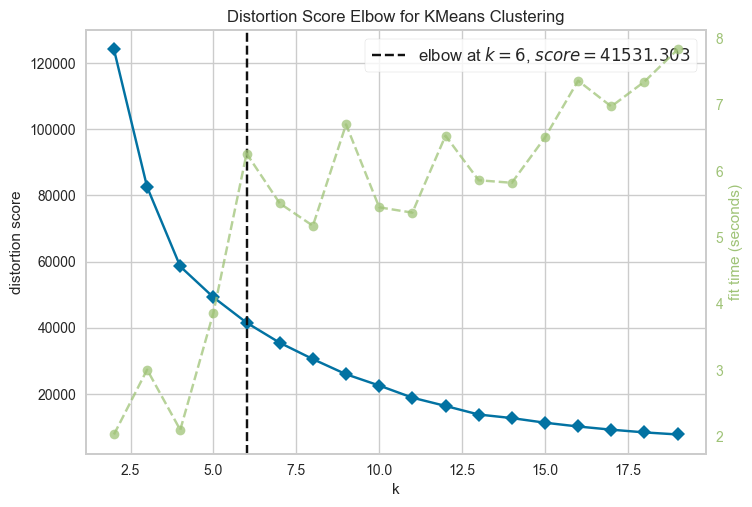

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# réduction de dimension
pca = PCA(2)
 
#Transform the data
pca.fit(X)
df = pca.transform(X)

#Elbow Method for K means
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(df)
visualizer.show()

In [11]:
# Clustering
kmeans = KMeans(n_clusters=6) 

# result = kmeans.fit(X)
kmeansFit = kmeans.fit(df)
label = kmeansFit.predict(df)
print(label)


/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[4 1 0 ... 4 4 4]


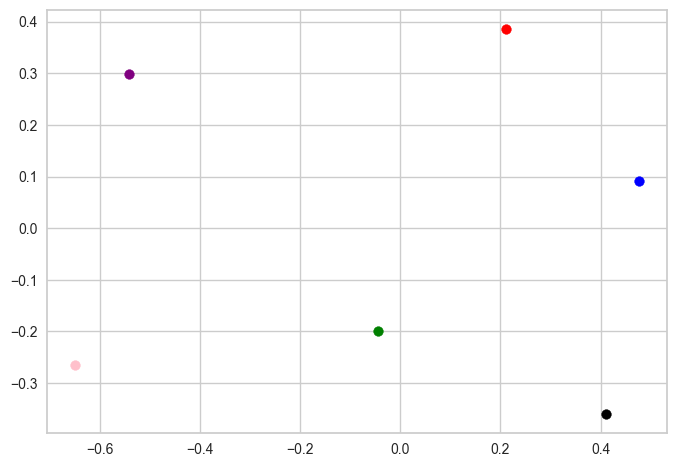

In [12]:
# display clusters center
cluster_center = kmeans.cluster_centers_

plt.scatter(cluster_center[0, 0] , cluster_center[0, 1], color="red")
plt.scatter(cluster_center[1, 0], cluster_center[1, 1], color="green")
plt.scatter(cluster_center[2, 0] , cluster_center[2, 1], color="blue")
plt.scatter(cluster_center[3, 0] , cluster_center[3, 1], color="purple")
plt.scatter(cluster_center[4, 0] , cluster_center[4, 1], color="pink")
plt.scatter(cluster_center[5, 0] , cluster_center[5, 1], color="black")
plt.show()


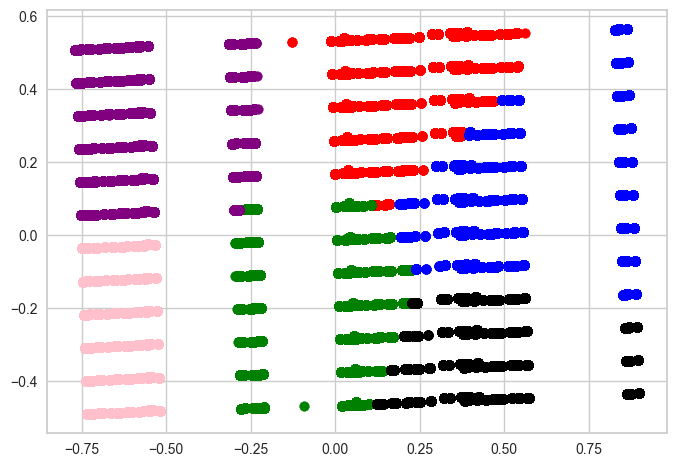

In [13]:
#filter rows of original data
filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label3 = df[label == 3]
filtered_label4 = df[label == 4]
filtered_label5 = df[label == 5]
 
#plotting the results
plt.scatter(filtered_label0[:, 0] , filtered_label0[:, 1], color="red")
plt.scatter(filtered_label1[:, 0], filtered_label1[:, 1], color="green")
plt.scatter(filtered_label2[:, 0] , filtered_label2[:, 1], color="blue")
plt.scatter(filtered_label3[:, 0] , filtered_label3[:, 1], color="purple")
plt.scatter(filtered_label4[:, 0] , filtered_label4[:, 1], color="pink")
plt.scatter(filtered_label5[:, 0] , filtered_label5[:, 1], color="black")
plt.show()

In [14]:
#Import kado dataset
randomClientDF = pd.read_csv('./randomClient.csv')

In [15]:
#Retrieve a random Client
randomClient = randomClientDF.sample()

# drop the CLI_ID to predict the client cluster
randomClient_ID = randomClient["CLI_ID"]
randomClient.drop(['CLI_ID'], axis=1, inplace=True)

#Encode string data
randomClient['UNIVERS'] = leUnivers.transform(randomClient["UNIVERS"])
randomClient["FAMILLE"] = leFamille.transform(randomClient["FAMILLE"])
randomClient["MAILLE"] = leMaille.transform(randomClient["MAILLE"])

#Scale data
randomClient = ms.transform(randomClient)
randomClient_2Dimensions = pca.transform(randomClient)

#predict cluster
randomClientCluster = kmeansFit.predict(randomClient_2Dimensions)[0]
print('randomClient cluster : ', randomClientCluster)

randomClient cluster :  1


In [16]:
#We retrieve all the client in the dataset
clusterClient = dataset[label == randomClientCluster]

clusterClient["UNIVERS"] = leUnivers.inverse_transform(clusterClient["UNIVERS"])
clusterClient["FAMILLE"] = leUnivers.inverse_transform(clusterClient["FAMILLE"])
clusterClient["MAILLE"] = leUnivers.inverse_transform(clusterClient["MAILLE"])

clusterClient

/var/folders/ky/584rlmcs2dndhktllgbrvq300000gn/T/ipykernel_863/403185248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusterClient["UNIVERS"] = leUnivers.inverse_transform(clusterClient["UNIVERS"])
/var/folders/ky/584rlmcs2dndhktllgbrvq300000gn/T/ipykernel_863/403185248.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusterClient["FAMILLE"] = leUnivers.inverse_transform(clusterClient["FAMILLE"])
/var/folders/ky/584rlmcs2dndhktllgbrvq300000gn/T/ipykernel_863/403185248.py:6: SettingWithCopyWarnin

,UNIVERS,MOIS_VENTE,FAMILLE,MAILLE,"('PRIX_NET', 'min')","('PRIX_NET', 'max')","('PRIX_NET', 'mean')"
CLI_ID,,,,,,,
13290776,PARF_EAUX PARFUMS,12,CAP_TENUE DE LA COIFFURE,HYG_DOUCHE AUTRES,1.75,13.00,6.166667
126716008,PARF_PARF ET EAU DE PARF,10,CAP_TENUE DE LA COIFFURE,HYG_DOUCHE AUTRES,26.50,26.50,26.500000
321933797,MAQ_TEINT Poudres,6,CAP_SHAMP TRAITANT,CORPS_SOINS HAMMAM,1.50,13.00,6.125000
356832238,PARF_EAUX DE COLOGNE,11,CAP_TENUE DE LA COIFFURE,HYG_DOUCHE AUTRES,1.95,7.95,5.350000
356998310,MAQ_TEINT Font teint,11,CAP_SHAMP TRAITANT,CORPS_SOINS HAMMAM,2.25,19.25,6.750000
...,...,...,...,...,...,...,...
997048646,MAQ_YEUX Mascara Specifique,8,CAP_SHAMP TRAITANT,HYG_DEO AUTRES,10.95,10.95,10.950000
997048654,PARF_EAUX PLAISIR NATURE,8,CAP_TENUE DE LA COIFFURE,HYG_DEO JARDINMONDE,7.90,7.90,7.900000
997048662,MAQ_ONG Vernis LUM,8,CAP_SHAMP TRAITANT,CORPS_SOIN PIEDS ET JAMBES,1.95,6.95,4.450000


In [17]:
# Analyse de ce qui compose le cluster
print("valeur unique UNIVERS : ", len(clusterClient["UNIVERS"].unique()) ,"\n",clusterClient["UNIVERS"].unique(), "\n")
print("valeur unique FAMILLE : ",len(clusterClient["FAMILLE"].unique()) ,"\n", clusterClient["FAMILLE"].unique(), "\n")
print("valeur unique MAILLE : ",len(clusterClient["MAILLE"].unique()) ,"\n" ,clusterClient["MAILLE"].unique(), "\n")

valeur unique UNIVERS :  32 
 ['PARF_EAUX PARFUMS' 'PARF_PARF ET EAU DE PARF' 'MAQ_TEINT Poudres'
 'PARF_EAUX DE COLOGNE' 'MAQ_TEINT Font teint' 'PARF_EAUX PLAISIR NATURE'
 'MAQ_YEUX Stylos' 'MAQ_ONG AUTRES' 'MAQ_ONG Vernis LUM' 'MAQ_LEV AUTRES'
 'PARF_EAUX MONOI' 'MAQ_YEUX Sourcils' 'MAQ_YEUX Eyeliner'
 'PARF_EAUX HOMMES' 'MAQ_TEINT Perfect Correcteur' 'MAQ_YEUX Crayons'
 'MAQ_ONG Vernis CN' 'MAQ_YEUX Mascara Specifique'
 'MAQ_TEINT Fard a joues' 'MAQ_YEUX Mascara SexyPulp' 'MAQ_YEUX Fard'
 'MAQ_LEV RAL Brillance' 'PARF_APRES RASAGE' 'MAQ_LEV RAL GrdRouge'
 'MAQ_LEV RAL Lum4' 'MAQ_YEUX Mascara Vertige' 'MAQ_YEUX Mascara Elixir'
 'MAQ_YEUX Mascara Basic' 'PARF_EAUX EDIT NOEL ETE' 'SOINS CORPS ANTI-AGE'
 'MAQ_LEV RAL Hydr' 'MULTI FAMILLES'] 

valeur unique FAMILLE :  4 
 ['CAP_TENUE DE LA COIFFURE' 'CAP_SHAMP TRAITANT' 'CAP_TRAITEMENT'
 'CAP_SHAMP TSCHEVEUX'] 

valeur unique MAILLE :  12 
 ['HYG_DOUCHE AUTRES' 'CORPS_SOINS HAMMAM' 'HYG_DEO JARDINMONDE'
 'HYG_BAIN SEL HUILE PERLE' 'CORPS

In [18]:
# import données client
kaDo = pd.read_csv("../KaDo.csv")
kaDo = kaDo.set_index("CLI_ID")

FileNotFoundError: [Errno 2] No such file or directory: 'KaDo.csv'

In [ ]:
# récupération des achats de tout les clients dans ce cluster
clientData = kaDo.loc[clusterClient.index.values]
clientData

In [ ]:
# recommandation par article le plus vendue dans le cluster
salesPerItems = clientData["LIBELLE"].value_counts()
mostSalesItemsKey = salesPerItems.keys()[0]
print("Objet recommander pour l'utilisateur : ", mostSalesItemsKey)
